In [2]:
from cil.framework import ImageGeometry
from cil.utilities.jupyter import islicer
from cil.utilities.display import show2D, show1D, show_geometry
from cil.processors import CentreOfRotationCorrector, TransmissionAbsorptionConverter, RingRemover, Padder, Slicer
from cil.recon import FBP
from cil.io import NEXUSDataWriter
from cil.io.utilities import HDF5_utilities
import numpy as np
import os
import hdf5plugin
from cil.framework import AcquisitionGeometry, AcquisitionData
import matplotlib.pyplot as plt
from tomopy.prep.phase import retrieve_phase
from cil.io import NEXUSDataWriter, NEXUSDataReader

PDHG with isotropic TV, increasing TV regularisation parameter $\alpha$

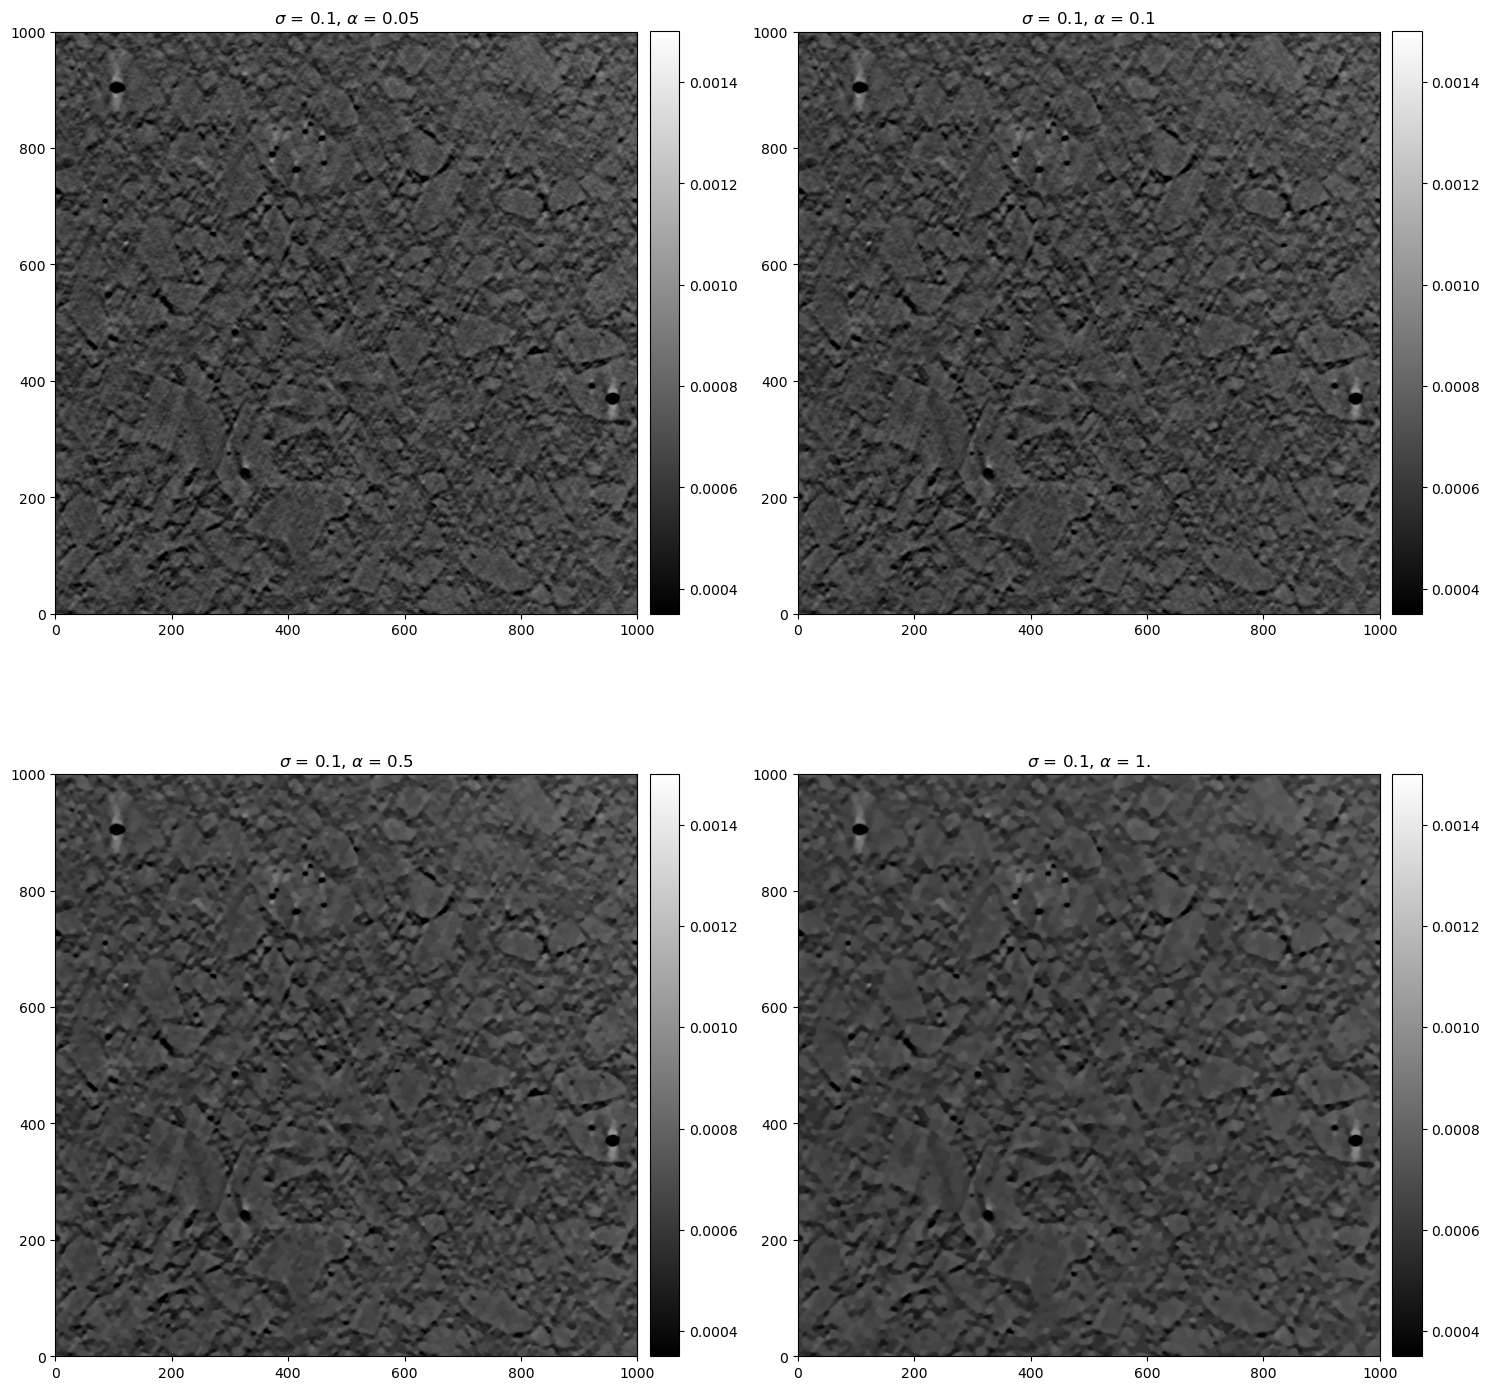

In [3]:
alpha_string = ['005','01','05','1'] 
i = 0
sigma = '01'

reco_array = []
title_array = []
for i in np.arange(len(alpha_string)):
    reader = NEXUSDataReader()
    reader.set_up(file_name='long_sigma' + sigma + '_reco_alpha' + alpha_string[i] + '.nxs')
    reco = reader.read()
    reco.apply_circular_mask(0.9)
    reco_array.append(reco.array[1000:2000,1000:2000])
    title_array.append(r"$\sigma$ = 0.1, $\alpha$ = " + alpha_string[i][:1] + '.' + alpha_string[i][1:])
show2D(reco_array, title_array, fix_range=(0.00035,0.0015))

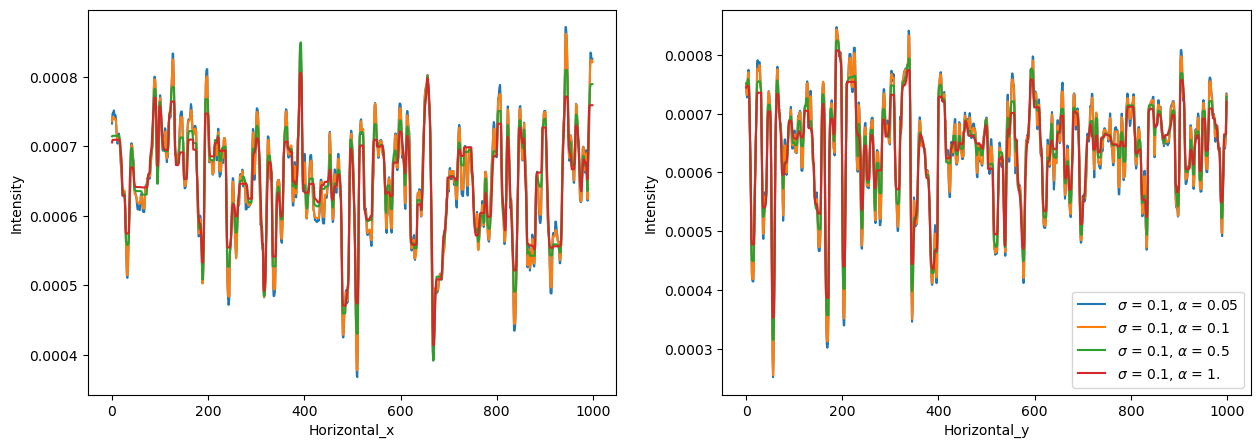

In [4]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
for i in np.arange(len(alpha_string)):
    ax = axs[0]
    ax.plot(reco_array[i][int(reco_array[i].shape[0]/2),:])
    ax.set_xlabel('Horizontal_x')
    ax.set_ylabel('Intensity')
    ax = axs[1]
    ax.plot(reco_array[i][:,int(reco_array[i].shape[1]/2)])
    ax.set_xlabel('Horizontal_y')
    ax.set_ylabel('Intensity')
ax.legend(title_array)


Text(0.5, 0, 'Intensity')

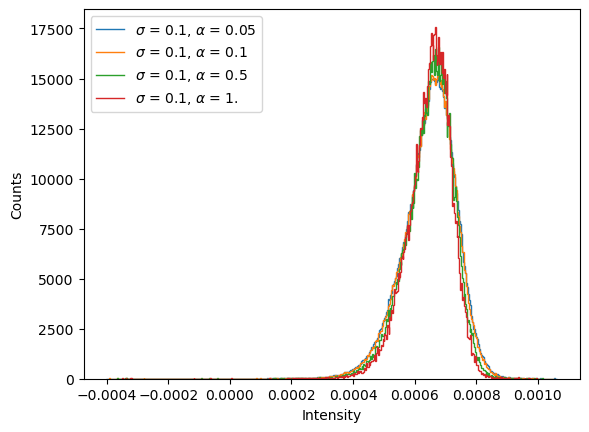

In [5]:
for i in np.arange(len(alpha_string)):
    counts, bins = np.histogram(reco_array[i], bins=500)
    plt.stairs(counts, bins)
plt.legend(title_array)
plt.ylabel('Counts')
plt.xlabel('Intensity')


In [6]:
reco_iso = reco_array[2]
title_iso = title_array[2]

Anisotropic TV, increasing strength of $\alpha_{dy}$

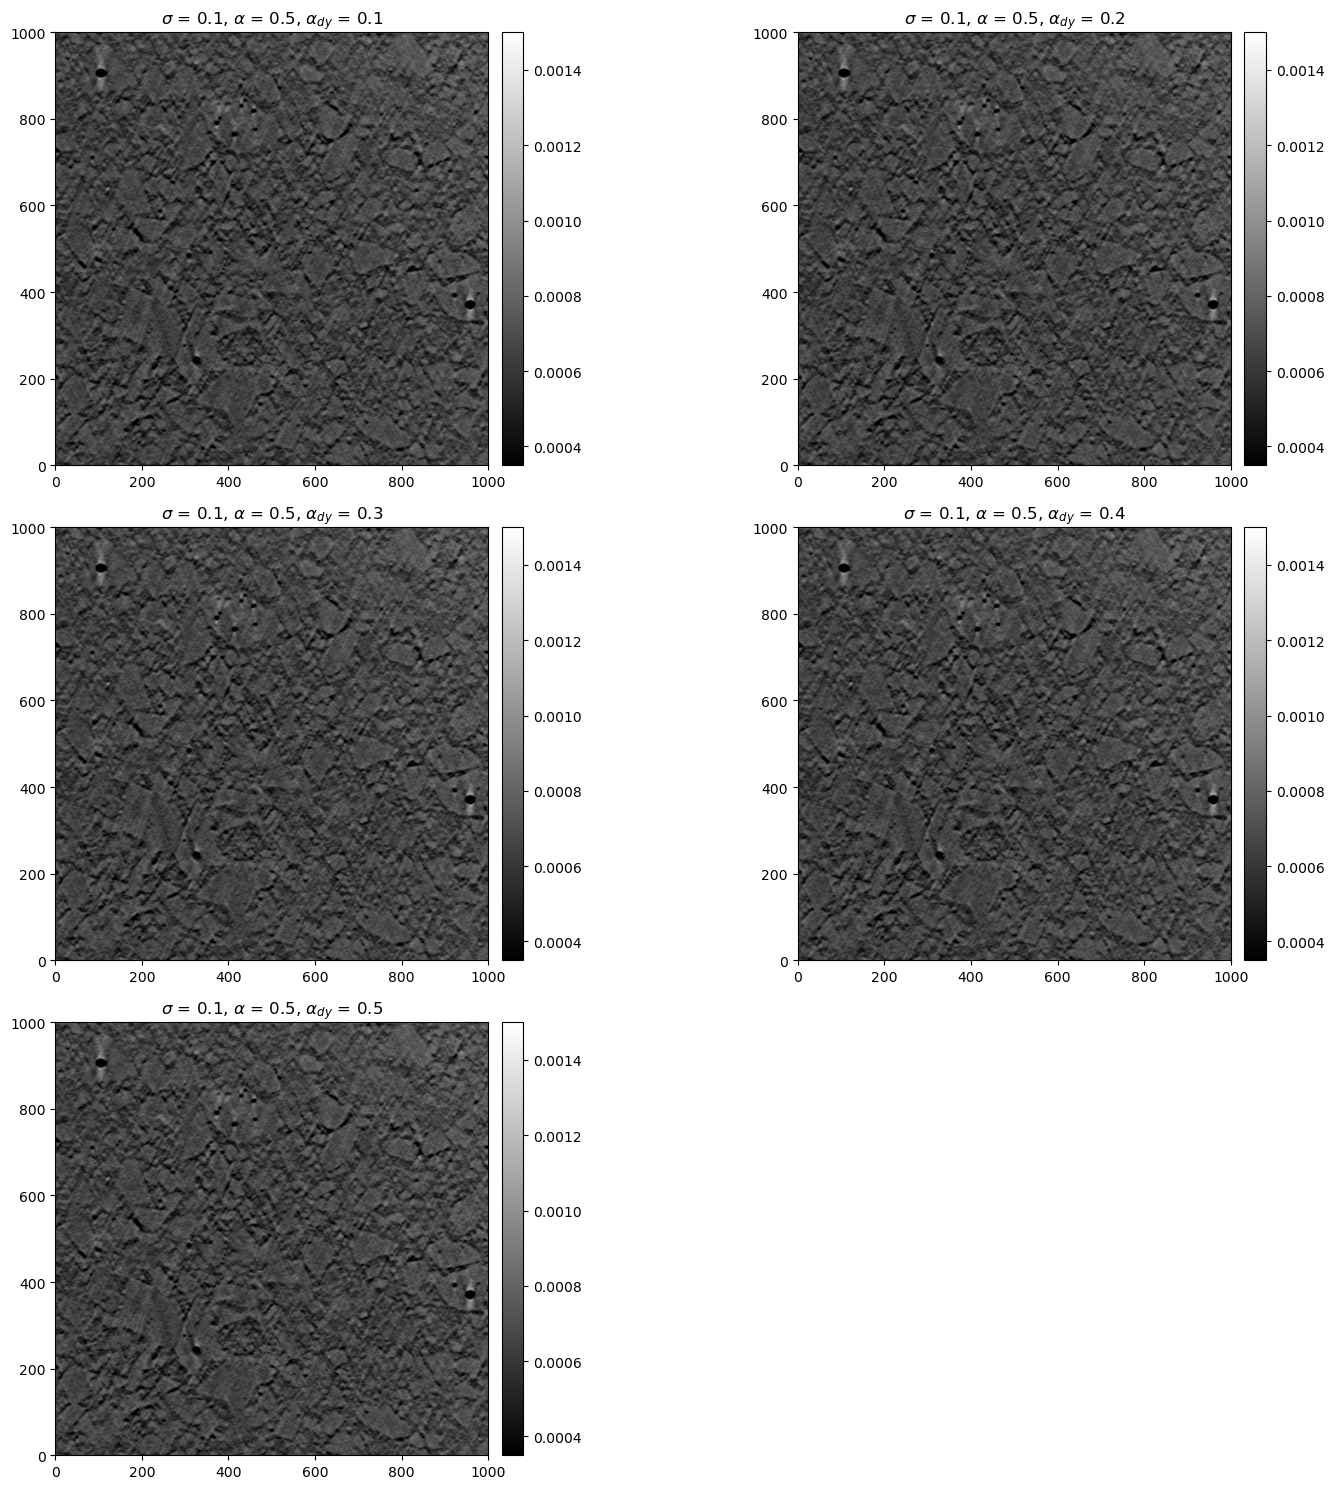

In [7]:
dy_string = ['01','02','03','04','05'] 
i = 0
sigma = '01'
alpha = '05'

reco_array = []
title_array = []
for i in np.arange(len(dy_string)):
    reader = NEXUSDataReader()
    reader.set_up(file_name='long_sigma' + sigma + '_reco_alpha' + alpha + '_alphady'+ dy_string[i] + '.nxs')
    reco = reader.read()
    reco.apply_circular_mask(0.9)
    reco_array.append(reco.array[1000:2000,1000:2000])
    title_array.append(r"$\sigma$ = 0.1, $\alpha$ = 0.5, $\alpha_{dy}$ = "+ dy_string[i][:1] + '.' + dy_string[i][1:])
show2D(reco_array, title_array, fix_range=(0.00035,0.0015))

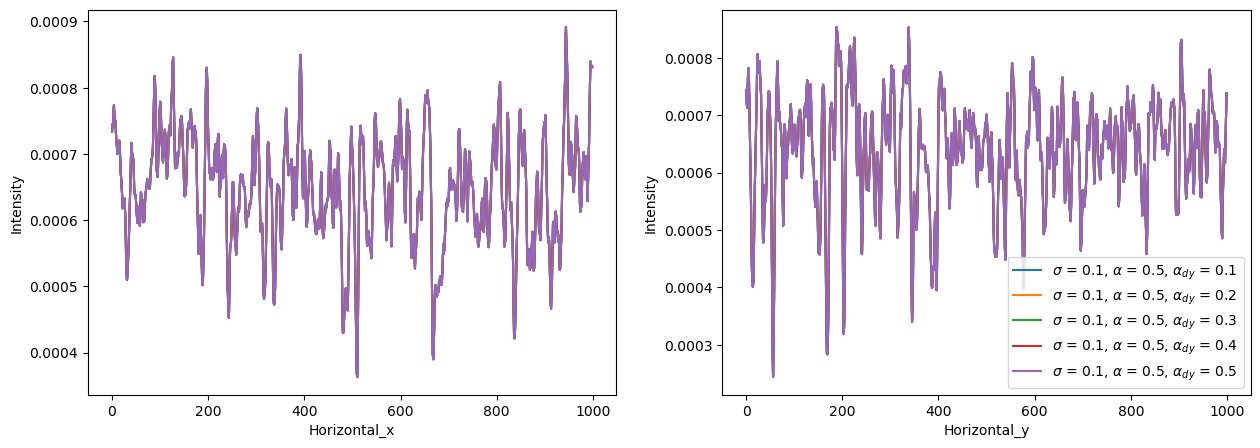

In [10]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
for i in np.arange(len(dy_string)):
    ax = axs[0]
    ax.plot(reco_array[i][int(reco_array[i].shape[0]/2),:])
    ax.set_xlabel('Horizontal_x')
    ax.set_ylabel('Intensity')
    ax = axs[1]
    ax.plot(reco_array[i][:,int(reco_array[i].shape[1]/2)])
    ax.set_xlabel('Horizontal_y')
    ax.set_ylabel('Intensity')
ax.legend(title_array)


(0.0, 20.0)

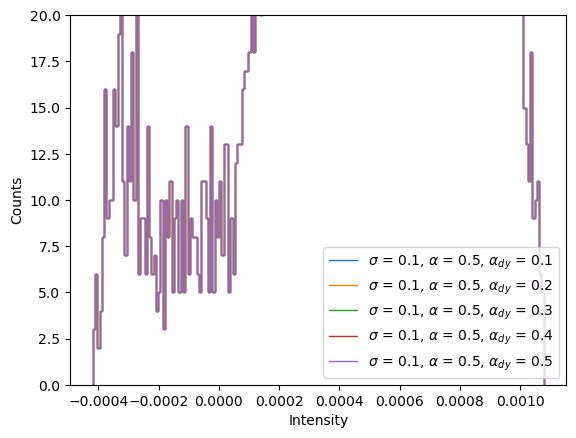

In [8]:
for i in np.arange(len(dy_string)):
    counts, bins = np.histogram(reco_array[i], bins=200)
    plt.stairs(counts, bins)
plt.legend(title_array)
plt.ylabel('Counts')
plt.xlabel('Intensity')
plt.ylim([0, 20])

Compare anisotopric TV to isotropic 

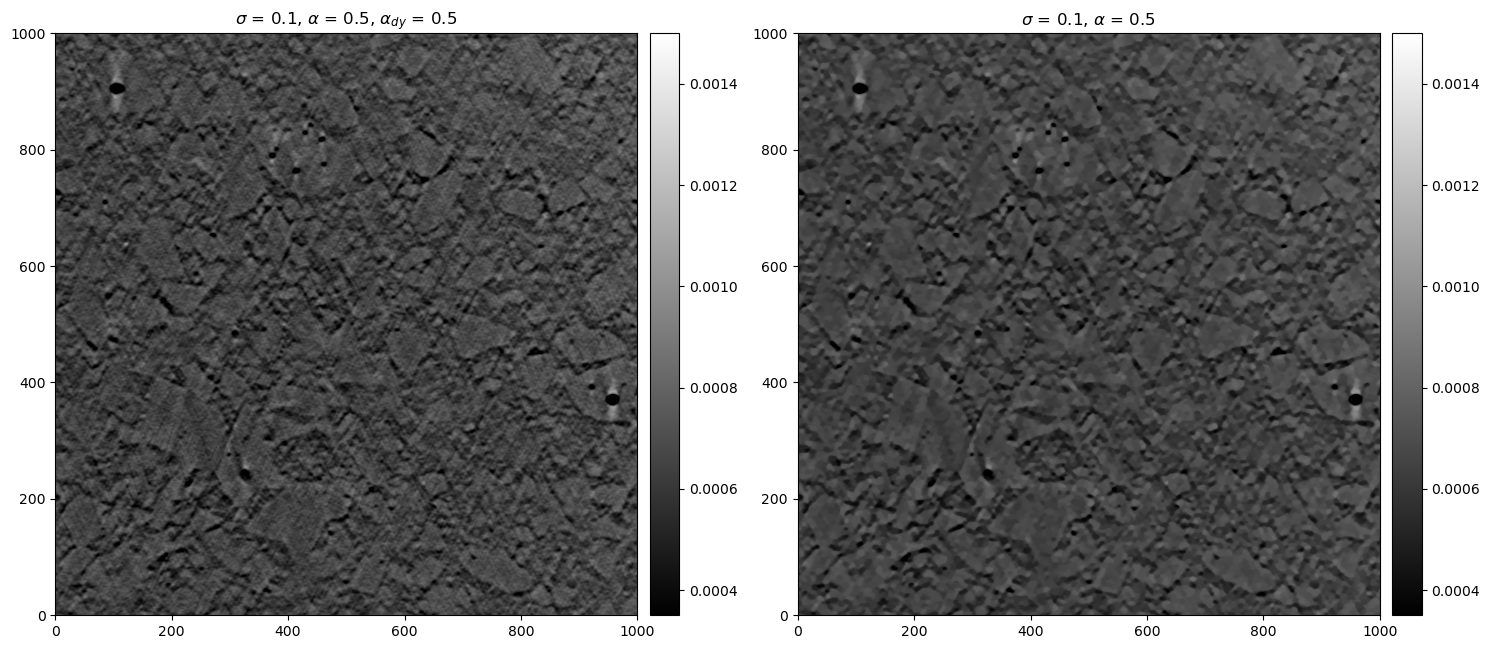

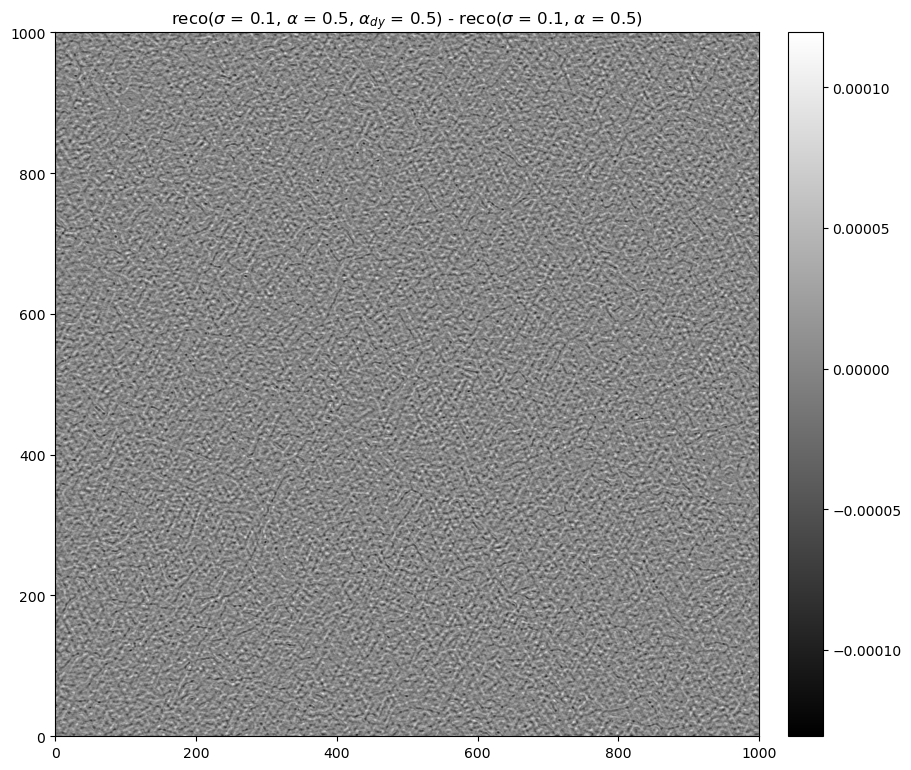

In [10]:
i = 4 # choose which alpha_dy strength to compare
show2D([reco_array[i], reco_iso], [title_array[i], title_iso], fix_range=(0.00035,0.0015))
show2D(reco_array[i]-reco_iso,  'reco(' + title_array[i] + r') - reco(' + title_iso + ')')

(0.0, 20.0)

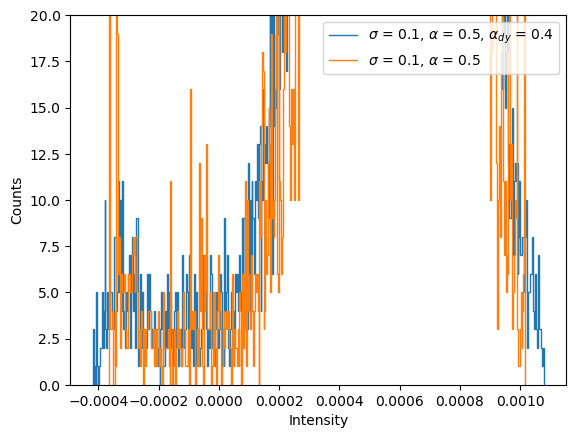

In [209]:
i = 3 # choose which alpha_dy strength to compare
counts, bins = np.histogram(reco_array[i], bins=500)
plt.stairs(counts, bins)
counts, bins = np.histogram(reco_iso, bins=500)
plt.stairs(counts, bins)
plt.legend([title_array[i], title_iso])
plt.ylabel('Counts')
plt.xlabel('Intensity')
plt.ylim([0, 20])

Comparison of reconstruction for different strength of $\alpha_{dy}$

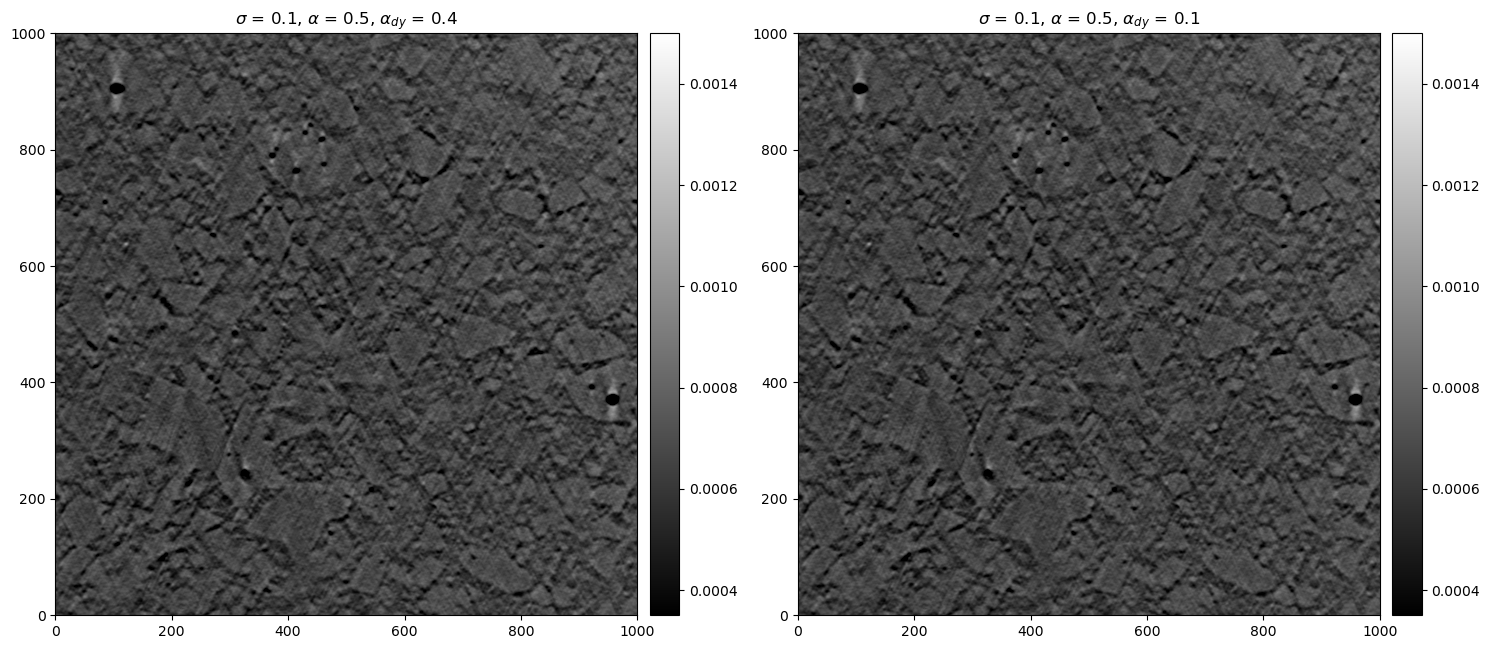

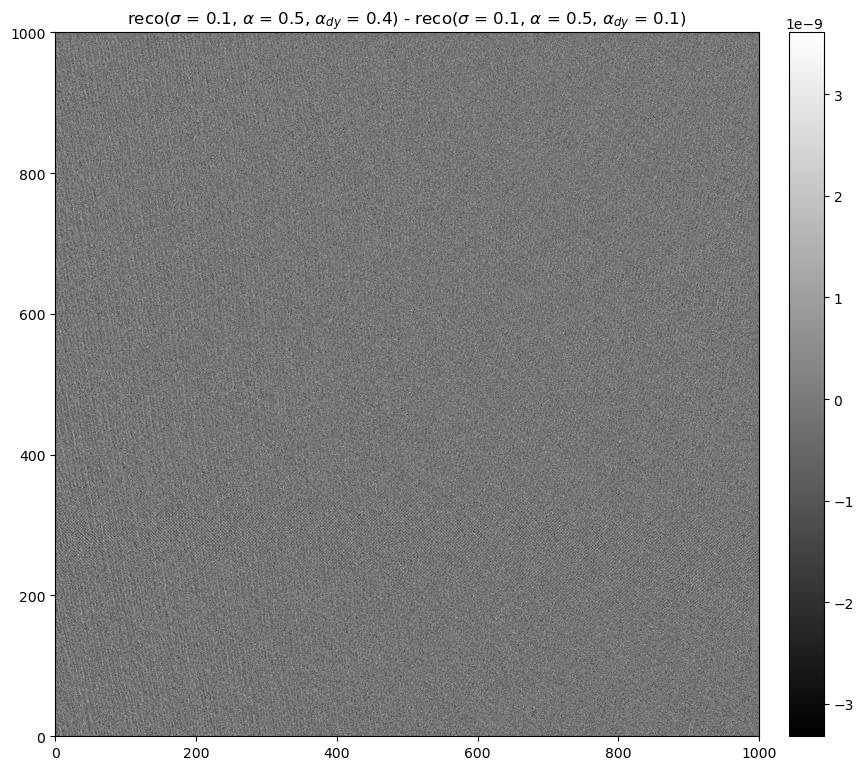

In [212]:
i = 3 # choose which alpha_dy strength to compare
j = 0

show2D([reco_array[i],reco_array[j]], [title_array[i], title_array[j]], fix_range=(0.00035,0.0015))
show2D(reco_array[i]-reco_array[j], 'reco(' + title_array[i] + ') - reco(' + title_array[j] + ')')

(0.0, 50.0)

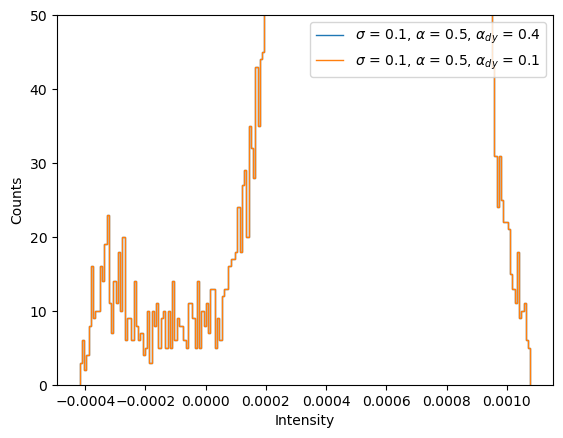

In [216]:
i = 3 # choose which alpha_dy strength to compare
j = 0

counts, bins = np.histogram(reco_array[i], bins=200)
plt.stairs(counts, bins)
counts, bins = np.histogram(reco_array[j], bins=200)
plt.stairs(counts, bins)
plt.legend([title_array[i], title_array[j]])
plt.ylabel('Counts')
plt.xlabel('Intensity')
plt.ylim([0, 50])

Using $\alpha_{dx}$

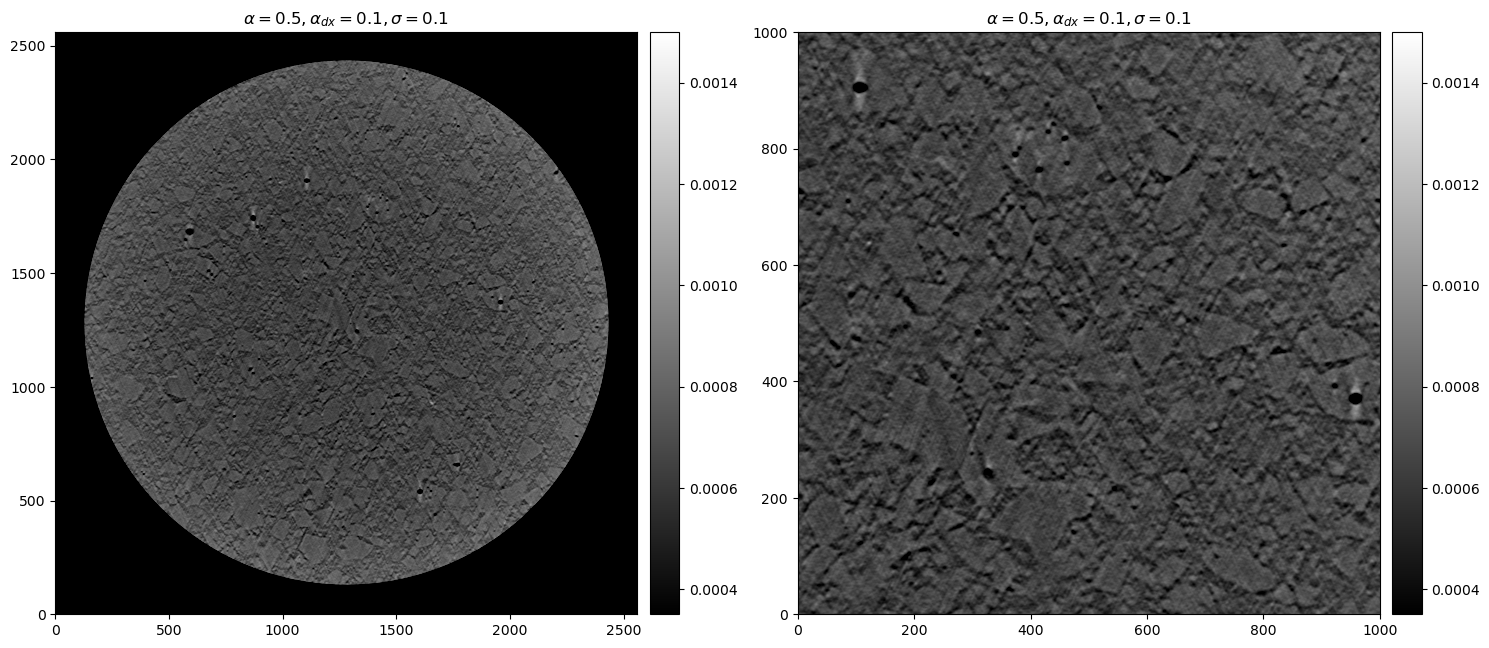

In [185]:
# long_sigma01_reco_alpha05_alphadx01.nxs
file_name='long_sigma01_reco_alpha05_alphadx01.nxs'
reader = NEXUSDataReader()
reader.set_up(file_name=file_name)
recox = reader.read()
recox.apply_circular_mask(0.9)
titlex = r'$\alpha = 0.5, \alpha_{dx} = 0.1, \sigma = 0.1$'
show2D([recox.array,recox.array[1000:2000,1000:2000]], title=titlex, fix_range=(0.00035,0.0015))


Comparison $\alpha_{dx}$ with $\alpha_{dy}$

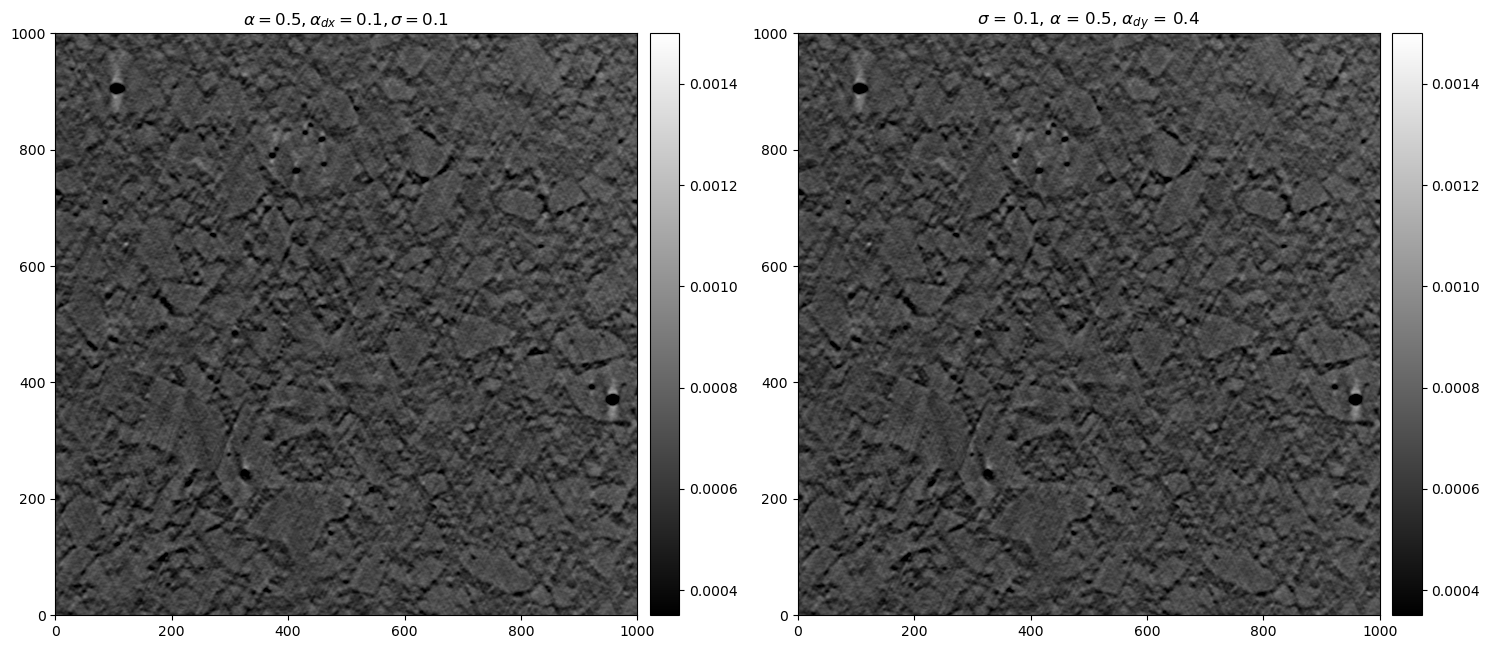

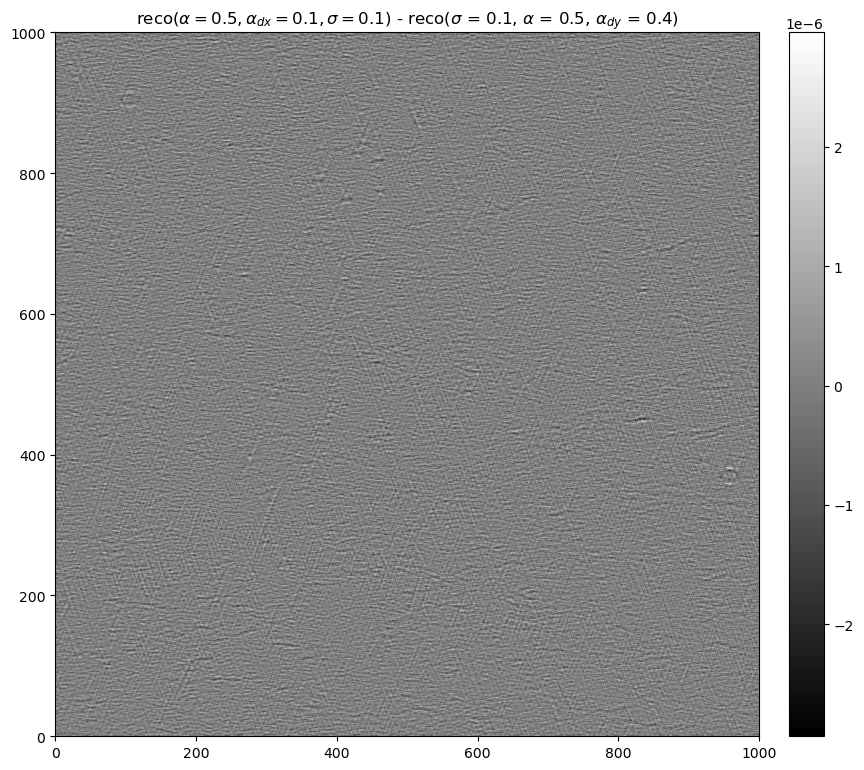

Text(0.5, 0, 'Intensity')

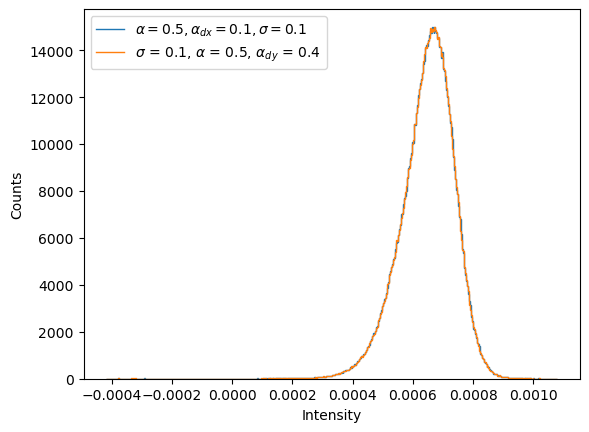

In [187]:
i = 3 # choose which alpha_dy strength to compare
show2D([recox.array[1000:2000,1000:2000], reco_array[i]], [titlex, title_array[i]],  fix_range=(0.00035,0.0015))
show2D(recox.array[1000:2000,1000:2000]-reco_array[i], r'reco(' + titlex + ') - reco(' + title_array[i] + ')')

counts, bins = np.histogram(recox.array[1000:2000,1000:2000], bins=500)
plt.stairs(counts, bins)
counts, bins = np.histogram(reco_array[i], bins=500)
plt.stairs(counts, bins)
plt.legend([titlex, title_array[i]])
plt.ylabel('Counts')
plt.xlabel('Intensity')

Compare objective functions

(18000.0, 23000.0)

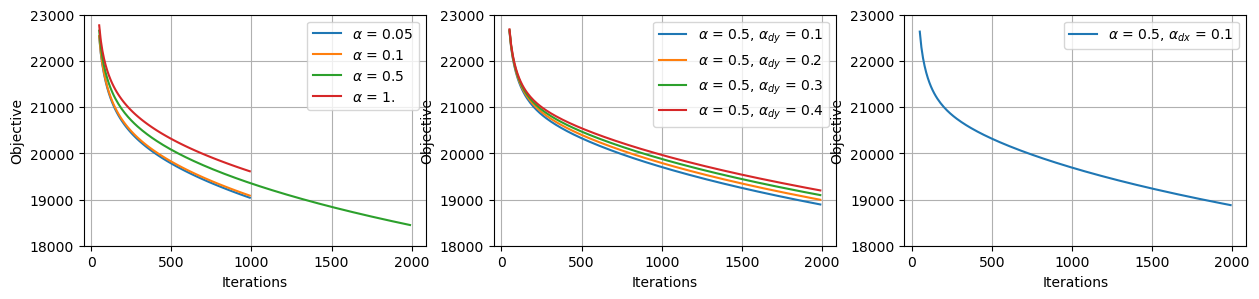

In [154]:
fig, axs = plt.subplots(1,3,figsize = (15,3))
alpha_string = ['005','01','05','1'] 
i = 0
sigma = '01'

ax = axs[0]
for i in np.arange(len(alpha_string)):
    obj = np.load('long_sigma' + sigma + '_obj_alpha' + alpha_string[i] + '.npy')
    ax.plot(50+np.arange(len(obj[5:-1]))*10,obj[5:-1], label=r"$\alpha$ = " + alpha_string[i][:1] + '.' + alpha_string[i][1:])
ax.set_ylabel('Objective')
ax.set_xlabel('Iterations')
ax.legend()
ax.grid()
ax.set_ylim([18000, 23000])

dy_string = ['01','02','03','04'] 
i = 0
sigma = '01'
alpha = '05'

ax = axs[1]
for i in np.arange(len(dy_string)):
    reader = NEXUSDataReader()
    obj = np.load('long_sigma' + sigma + '_obj_alpha' + alpha + '_alphady'+ dy_string[i] + '.npy')
    ax.plot(50+np.arange(len(obj[5:-1]))*10,obj[5:-1], label=r"$\alpha$ = 0.5, $\alpha_{dy}$ = "+ dy_string[i][:1] + '.' + dy_string[i][1:])
ax.set_ylabel('Objective')
ax.set_xlabel('Iterations')
ax.legend()
ax.grid()
ax.set_ylim([18000, 23000])

ax = axs[2]
obj = np.load('long_sigma01_obj_alpha05_alphadx01.npy')
ax.plot(50+np.arange(len(obj[5:-1]))*10,obj[5:-1], label=r"$\alpha$ = 0.5, $\alpha_{dx}$ = 0.1")
ax.set_ylabel('Objective')
ax.set_xlabel('Iterations')
ax.legend()
ax.grid()
ax.set_ylim([18000, 23000])